# Final Project


## Data: Ford GoBike System Data

### Overview of the Data: 

<font size=3 >This data set includes information about individual rides made in a bike-sharing system covering the greater Sant Francisco Bay Area. The data inlcudes information about user trip location, gender and etc.<font/>.

### Short detail about visualisations and investigation of the data

<font size=3 >In this data visualization I mostly focused on user's status on gender and subscription, trip duration time and number of trips per.
by gender and subscription type <font/>.

### Exploration flow are divided to three steps including 2 or 3 plot for each step:
1. Univariate plots.
2. Bivariate plots.
3. Multivariate plots.

In [2]:
# Import Libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
from matplotlib import rcParams

%matplotlib inline

In [4]:
# load the dataset
bike = pd.read_csv('fordgobike.csv')
rcParams['figure.figsize'] = 11,8


####  Data issues: 
From the data as you can see starting time and eding time for bikes column data type need to be changed
- 'start_time and end_time' columns needs to be converted to datetime 
- member birthday is in float need to convert int 

In [8]:
# convert to datetime
bike.start_time = pd.to_datetime(bike.start_time)
bike.end_time = pd.to_datetime(bike.end_time)

# change data format birth year data format to int
bike.member_birth_year = bike.member_birth_year.astype('Int64')

# 1. Univariate plots

## 1.1 What user type is traveled more?

<font size = '4'> <b> From the plot output below I can easily say that subscribers of  a bike riding company did more trips, compared to ordinary customers of a company. To be more specific, subscribers traveled almost
double times more than customers </b>
</font> 

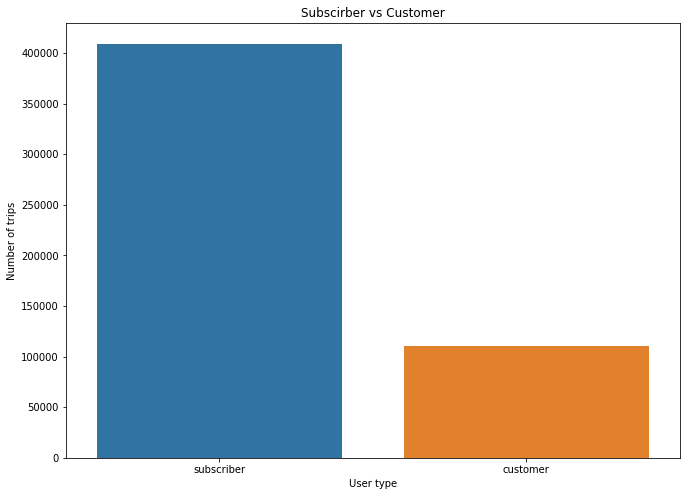

In [10]:
# the difference between subscribers and customer
user_count = np.array(bike.user_type.value_counts())
user_type = ['subscriber', "customer"]

ax = sb.barplot(x = user_type, y = user_count)

plt.xlabel('User type')
plt.ylabel('Number of trips')
plt.title('Subscirber vs Customer');



## 1.2 User birth year trip bar plot


<font size= '4'> 
    <b>People who was born between 1980 to 1995 have significantly more trips compared to other travelers.
and the trips was between 15000 to 25000, while other people was mostly below than 10000. This also tells that
people more gets older the more the trips will be decreased. Also, the figure below show that 1985 born travelers have maximum number of trips with almost 25000 
trips.</b>
    </font>

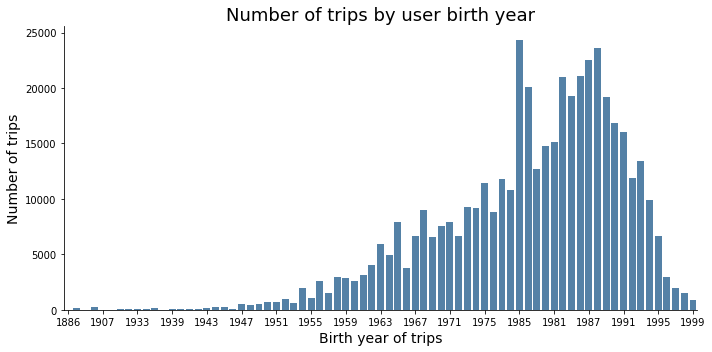

In [11]:
g = sb.catplot("member_birth_year", data=bike, aspect=2,
                kind="count", color='steelblue', height = 5)
g.set_xticklabels(step=4);
plt.xlabel('Birth year of trips', fontsize=14)
plt.ylabel('Number of trips', fontsize=14)
plt.title('Number of trips by user birth year', fontsize=18)
plt.tight_layout();


In [34]:
bike.member_gender.value_counts()

Male      348318
Female     98621
Other       6299
Name: member_gender, dtype: int64

## 1.3 Which gender type likes traveling with bike?

<font size= '4'> 
    <b> It is interesting to see that male gender type has more traveling.
    From our exploration, males travels more
    with almost 350000 trips, while female has only 100000 trips. 
trips.</b>
    </font>

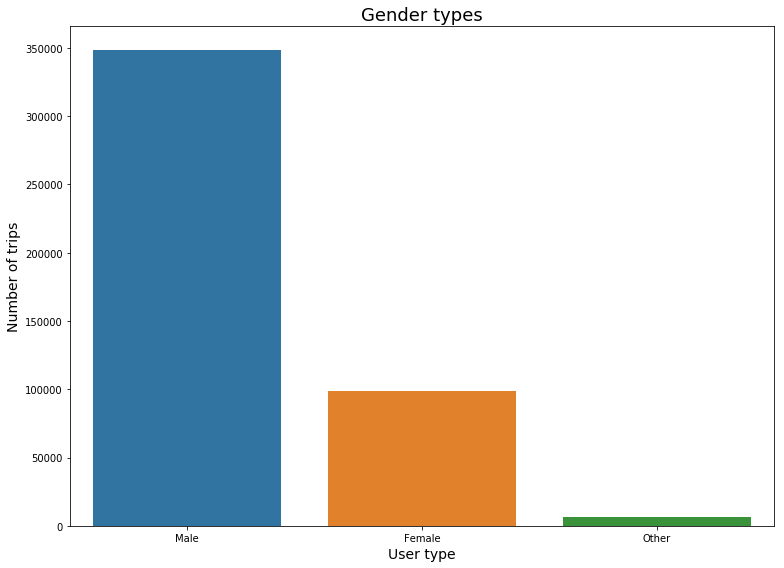

In [12]:
# plot for user gender types
user_count = np.array(bike.member_gender.value_counts())
user_type = ['Male', 'Female', 'Other']

ax = sb.barplot(x = user_type, y = user_count)

plt.xlabel('User type', fontsize=14)
plt.ylabel('Number of trips', fontsize=14)
plt.title('Gender types', fontsize=18)
plt.tight_layout()

# 2. Bivariate plots

## 2.1 Trip duration time density plot for the gender of members


<font size= '4'> 
    <b>From the figure below female has more trip duraion variation compared to man.However average trip duration time  is almost reaming similar by ranging 0 to 3000 seconds</b>
    </font>    

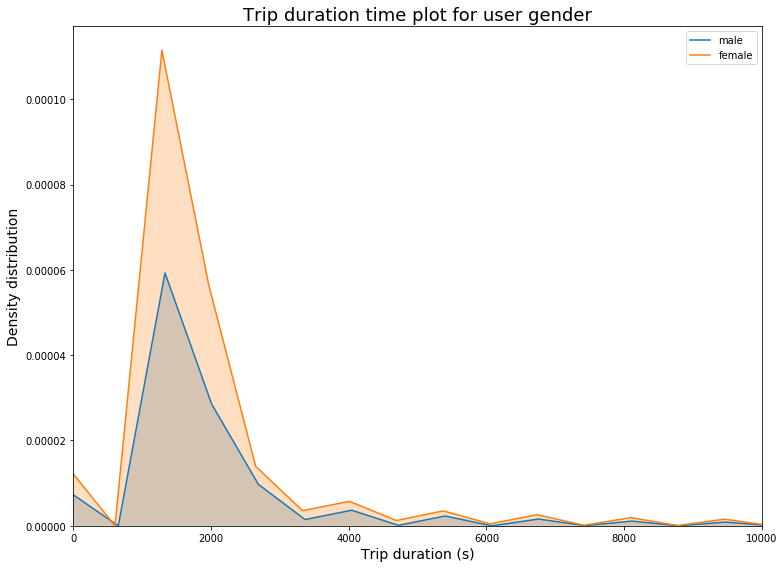

In [13]:
sb.kdeplot(bike.duration_sec[bike.member_gender == 'Male'], label = 'male', shade = True)
sb.kdeplot(bike.duration_sec[bike.member_gender == 'Female'], label = 'female', shade = True)
#sb.kdeplot(bike.duration_sec[bike.member_gender == 'Other'], label = 'other', shade = True)
#plt.gca().invert_xaxis()
plt.xlim(0, 10000)
plt.xlabel('Trip duration (s)', fontsize=14)
plt.ylabel('Density distribution', fontsize=14)
plt.title('Trip duration time plot for user gender', fontsize=18)
plt.tight_layout()

## 2.2 The user type distribution based on their gender 

<font size= '4'> 
    <b>It is obvious to say that men has more trips for both custmores and subscribers for bike traveling. The subscribes experienced to have
more trips compared to subscribers. To be more specifice men for subscribers has over than 300.000 trips while male customers
have less than 5000 trips. Similarly, women for subsciribers have significantl higher amount of trips in compared to customer women.
Overall, subscribers tend to have more trips than customers with noticeable difference.</b>
    </font>

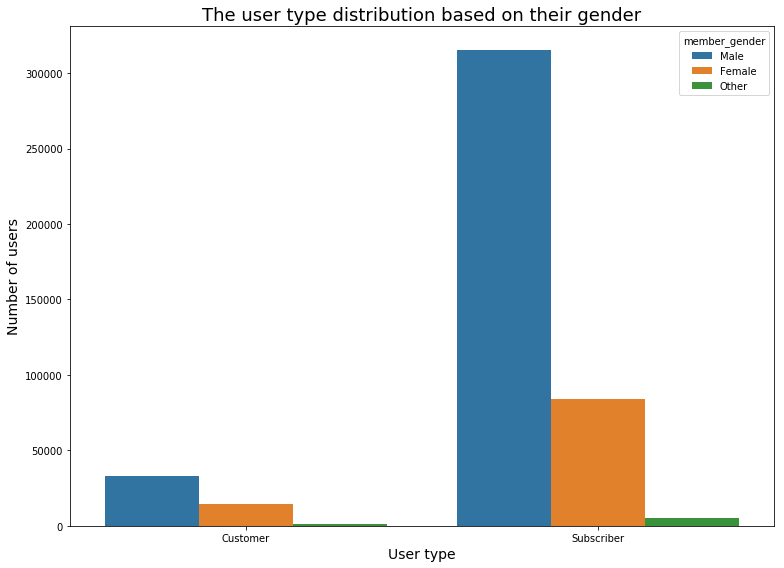

In [57]:
# plotting the user type with gender type of the members
sb.countplot(data = bike, x = 'user_type', hue = 'member_gender')
plt.xlabel('User type', fontsize=14)
plt.ylabel('Number of trips', fontsize=14)
plt.title('The user type distribution based on their gender', fontsize=18)
plt.tight_layout()

## 2.3 Trip duration time based on their gender






<font size= '4'> 
    <b>It looks like there is not significant difference on trip duration for male and female.
    However, Men users more close distribution of trip duration while female have slightly higher distribution. </b>
    </font>

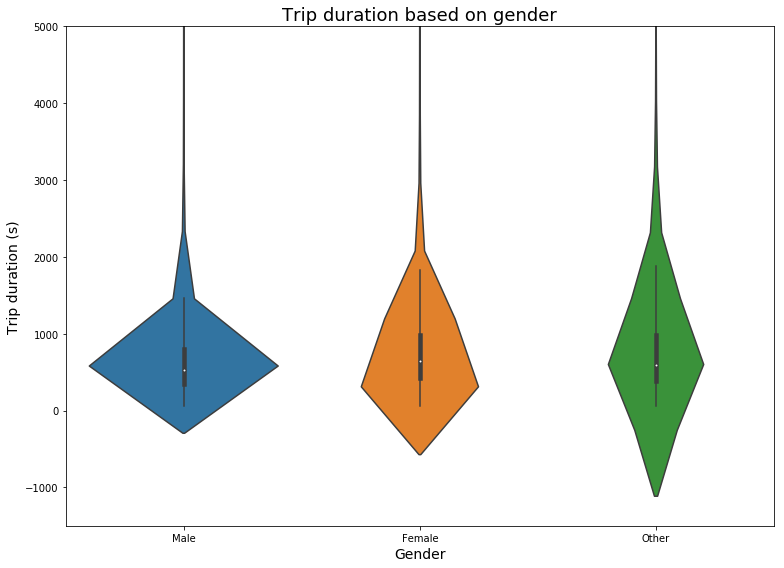

In [58]:
sb.violinplot("member_gender", "duration_sec", data = bike)
plt.ylim(-1500, 5000)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Trip duration (s)', fontsize=14)
plt.title('Trip duration based on gender', fontsize=18)
plt.tight_layout()

# 3. Multivariate plots

## 3.1 Multivariate plot of user's birth year, trip duration time and gender

<font size= '4'> 
    <b>Users by their birth year have linear relationship with gender. Most trips are done by young users and most of them have
    trip duration less than 20000 seconds.</b>
    </font>

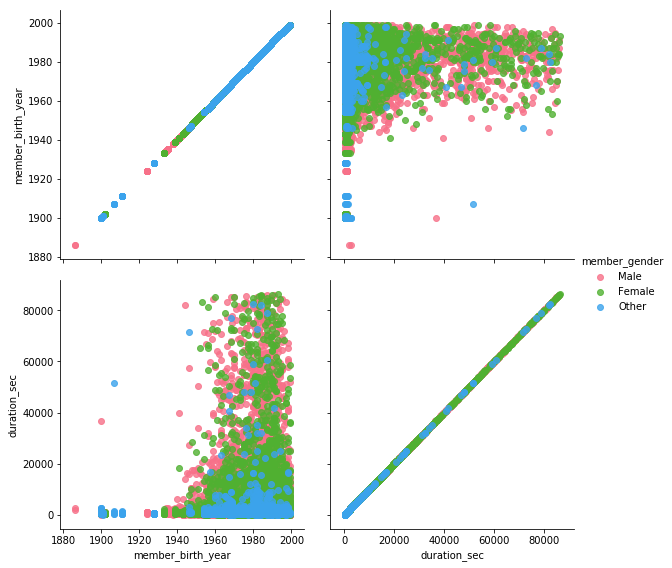

<Figure size 1080x1080 with 0 Axes>

In [53]:
g = sb.PairGrid(bike, vars=['member_birth_year', 'duration_sec'], hue = 'member_gender', palette = 'husl', height=4)
g.map(plt.scatter, alpha = 0.8)
g.add_legend()
plt.figure(figsize = (15, 15))
plt.tight_layout();

## 3.2 The disritbution of user gender and trip duration based on user type

<font size= '4'> 
    <b>Trip duration for customers have more wide time distribution compared to subscribers. Subscirbers for men and women genders
    show almost same time duration. Overall, All the bike riders shows less than 2000 second trip </b>
    </font>

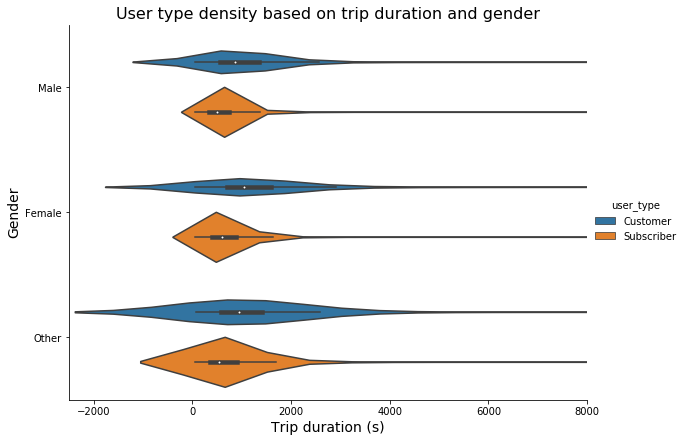

In [81]:
sb.catplot(x="duration_sec", y="member_gender", hue="user_type", kind="violin", data=bike, height=6, aspect = 1.4);
plt.xlim(-2500, 8000)
plt.xlabel('Trip duration (s)', fontsize=14)
plt.ylabel('Gender', fontsize=14)
plt.title('User type trip duration density based on a gender', fontsize=16);
